**<title>Data Visualization</title>**

**<h1>Imigration Data Visualization</h1>**

<hr>

*seaborn documentation: https://seaborn.pydata.org/<br>
*matplotlib documentation: https://matplotlib.org/<br>

In [128]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Dataset


Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website. <br>
The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The focus is on Canadian Immigration data.

In [130]:
# Load data Canada.xlsx -> sheet 'Canada by Citizenship'

df = pd.read_excel("Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=range(1)
                      )

In [131]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


# Data Preparation

`Task: `
1. Cek data info dan missing value
1. Drop semua variabel yang kamu anggap tidak informatif dan tidak diperlukan untuk visualisasi data. Berikan argumen mengapa kamu men-drop variabel tersebut!
1. Ubah nama variabel dengan ketentuan sebagai berikut:

`FROM` | `TO`
----   | ----
Odname | Country
AreaName | Continent
RegName | Region
DevName | Status

4. Jadikan variabel nama negara menjadi index untuk DataFrame!
5. Buatlah kolom baru bernama 'Total' yang isinya adalah jumlah imigran untuk tiap negara!
6. Buatlah sebuah kolom bernama 'Years' yang isinya adalah rentang tahun, dari tahun 1980 hingga 2013!

In [132]:
# 1 Cek data info dan missing value
# df.info()

In [133]:
# df.isnull().sum()

In [134]:
# 2 Drop semua variabel yang kamu anggap tidak informatif dan tidak diperlukan untuk visualisasi data. 
# Berikan argumen mengapa kamu men-drop variabel tersebut!
# df['Type'].unique()

df2 = df.drop(['Type'],axis=1)
# df2


In [135]:
# 3 Ubah nama variabel dengan ketentuan sebagai berikut:
df2.rename(columns={"OdName": "Country",
                    "AreaName": "Continent",
                    "RegName": "Region",
                    "DevName": "Status"},
           inplace=True)
df2

,Coverage,Country,AREA,Continent,REG,Region,DEV,Status,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,...,124,161,140,122,133,128,211,160,174,217
193,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,...,56,91,77,71,64,60,102,69,46,59
194,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,...,1450,615,454,663,611,508,494,434,437,407
195,Foreigners,Unknown,999,World,999,World,999,World,44000,18078,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


In [ ]:
# 4. Jadikan variabel nama negara menjadi index untuk DataFrame!
df2.set_index('Country', inplace=True)
# df2

In [ ]:
# 5. Buatlah kolom baru bernama 'Total' yang isinya adalah jumlah imigran untuk tiap negara!
df2['Total'] = df2.loc[:,1980:2014].sum(axis=1)
# df2

In [160]:
# 6. Buatlah sebuah kolom bernama 'Years' yang isinya adalah rentang tahun, dari tahun 1980 hingga 2013!
years = [(f'Year', year) for year in range(1980, 2014)]

# Convert the list of tuples to a MultiIndex
multi_index = pd.MultiIndex.from_tuples(years)
df3 = pd.DataFrame(
    data=[[i for i in range(1980, 2014)]],  # example data
    columns=multi_index
)
df3


Year                                                        ...        \
   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  2004   
0  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  2004   

                                                         
   2005  2006  2007  2008  2009  2010  2011  2012  2013  
0  2005  2006  2007  2008  2009  2010  2011  2012  2013  

[1 rows x 34 columns]

# Data Visualization

1. **Bagaimanakah distribusi frekuensi dari populasi imigran baru di Canada yang berasal dari berbagai negara pada tahun 2012?**

In [155]:
df2[2012]
# davis

Country
Afghanistan         2635
Albania              620
Algeria             3774
American Samoa         0
Andorra                1
                   ...  
Yemen                174
Zambia                46
Zimbabwe             437
Unknown             1681
Total             257903
Name: 2012, Length: 197, dtype: int64

2. **Bagaimanakah distribusi imigrasi untuk negara Jerman, Italia dan Swedia dari tahun 1980 hingga 2013? Ikuti spesifikasi berikut:**

- Axis y merupakan frekuensi distribusi berdasarkan 'years'.
- Jumlah bins = 15
- Transparency = 35%
- Warna tiap negara bebas, sesuaikan dengan preferensi masing-masing.

**Tampilkan hasilnya dalam 1 plot saja seperti contoh output di bawah ini:**<br><br>
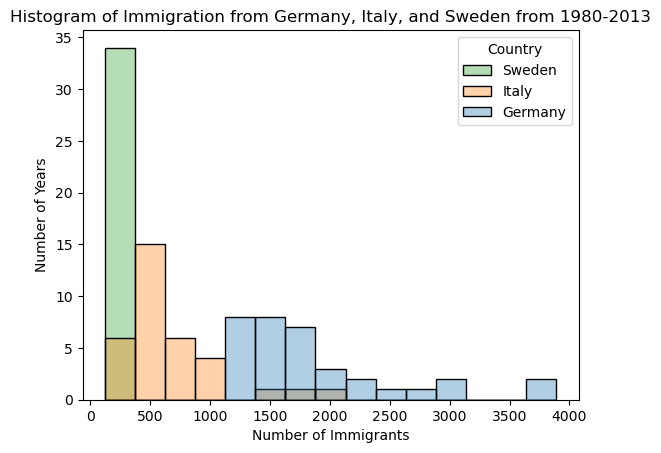
<!-- ![image.png](attachment:/content/drive/MyDrive/JCDS-0406/Module 2/4. Python for Data Visualization/30 Nov (Heatmap, Folium)/Exercise/image.png) -->

3. **Buatlah DataFrame baru bernama df_decades yang isinya adalah aggregasi tiap dekade (80an, 90an, 2000an) dan Buatlah boxplot untuk ketiga dekade yang telah dibuat, interpretasikan hasilnya!**

- 80's: 1980-1989
- 90's: 1990-1999
- 00's: 2000-2009



4. **Bandingkan trend imigrasi dari top 5 negara yang memiliki total imigran terbanyak ke Canada dari 1980-2013, interpretasikan hasilnya!**

5. **Plot proporsi (persentase) jumlah imigran berdasarkan benua pada tahun 2012, interpretasikan hasilnya!**

6. **Dengan menggunakan scatter plot, visualisasikan trend dari total imigrasi dari semua negara (akumulasi total semua negara) ke Canada pada rentang tahun 1980-2013. Interpretasikan hasilnya!**

7. **Dengan menggunakan Folium, visualisasikan persebaran total (1980-2013) jumlah imigran yang masuk ke Kanada dari setiap negara. Interpretasikan hasilnya!**